In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#Loading the dataset
data = pd.read_csv("data.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


Unnamed: 0    ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0           0  5524        1957  Graduation         Single  58138.0        0   
1           1  2174        1954  Graduation         Single  46344.0        1   
2           2  4141        1965  Graduation       Together  71613.0        0   
3           3  6182        1984  Graduation       Together  26646.0        1   
4           4  5324        1981         PhD        Married  58293.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  04-09-2012       58  ...                  7             0   
1         1  08-03-2014       38  ...                  5             0   
2         0  21-08-2013       26  ...                  4             0   
3         0  10-02-2014       26  ...                  6             0   
4         0  19-01-2014       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 30 columns]

In [3]:
data.tail()

Unnamed: 0     ID  Year_Birth   Education Marital_Status   Income  \
2235        2235  10870        1967  Graduation        Married  61223.0   
2236        2236   4001        1946         PhD       Together  64014.0   
2237        2237   7270        1981  Graduation       Divorced  56981.0   
2238        2238   8235        1956      Master       Together  69245.0   
2239        2239   9405        1954         PhD        Married  52869.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  \
2235        0         1  13-06-2013       46  ...                  5   
2236        2         1  10-06-2014       56  ...                  7   
2237        0         0  25-01-2014       91  ...                  6   
2238        0         1  24-01-2014        8  ...                  3   
2239        1         1  15-10-2012       40  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 30 columns]

In [4]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [5]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [6]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [9]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [10]:
data.describe()

Unnamed: 0         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1121.867329   52247.251354     0.441787     0.505415    49.012635   
std     643.164161   25173.076661     0.536896     0.544181    28.948352   
min       0.000000    1730.000000     0.000000     0.000000     0.000000   
25%     566.750000   35303.000000     0.000000     0.000000    24.000000   
50%    1120.500000   51381.500000     0.000000     0.000000    49.000000   
75%    1678.250000   68522.000000     1.000000     1.000000    74.000000   
max    2239.000000  666666.000000     2.000000     2.000000    99.000000   

             Wines       Fruits         Meat         Fish       Sweets  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean    305.091606    26.356047   166.995939    37.637635    27.028881  ...   
std     337.327920    39.793917   224.283273    54.752082    41.072046  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      24.000000     2.000000    16.000000     3.000000     1.000000  ...   
50%     174.500000     8.000000    68.000000    12.000000     8.000000  ...   
75%     505.000000    33.000000   232.250000    50.000000    33.000000  ...   
max    1493.000000   199.000000  1725.000000   259.000000   262.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 29 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

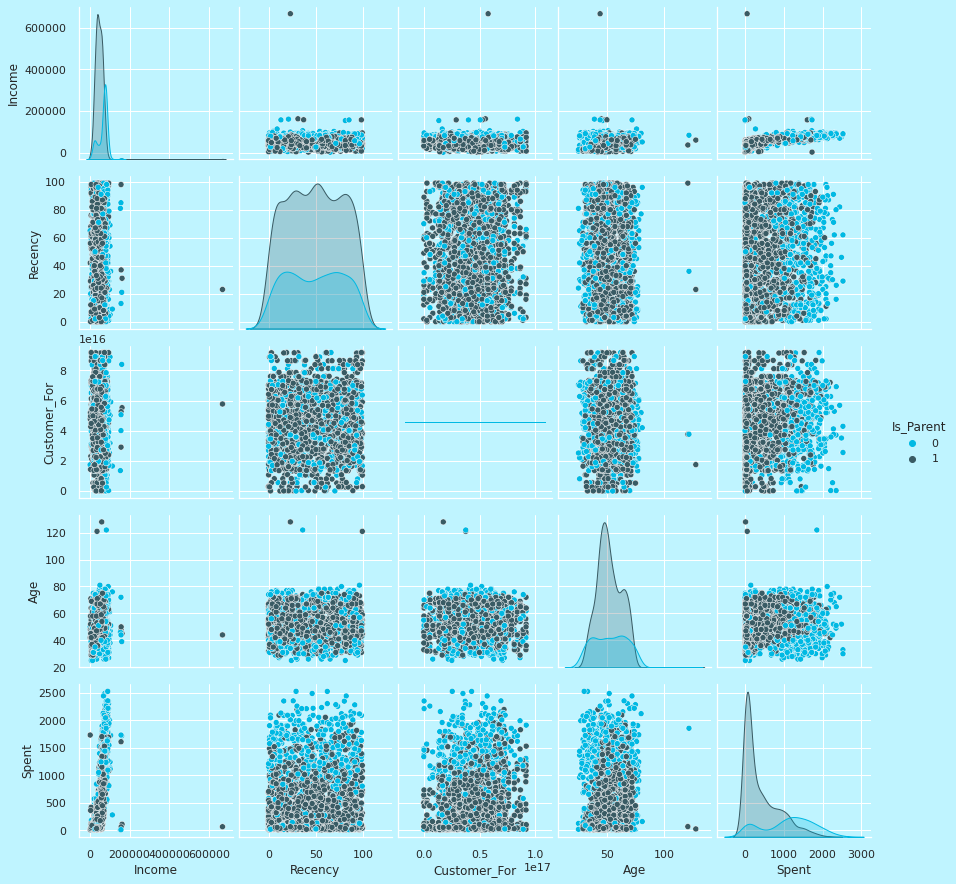

In [11]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#bff4ff","figure.facecolor":"#bff4ff"})
pallet = ["#F17925", "#395B64", "#252423","#94B49F", "#002B5B", "#00B9E3"]
cmap = colors.ListedColormap(["#F17925", "#395B64", "#252423","#94B49F", "#002B5B", "#00B9E3"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#00B9E3", "#395B64"]))
#Taking hue 
plt.show()

In [12]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


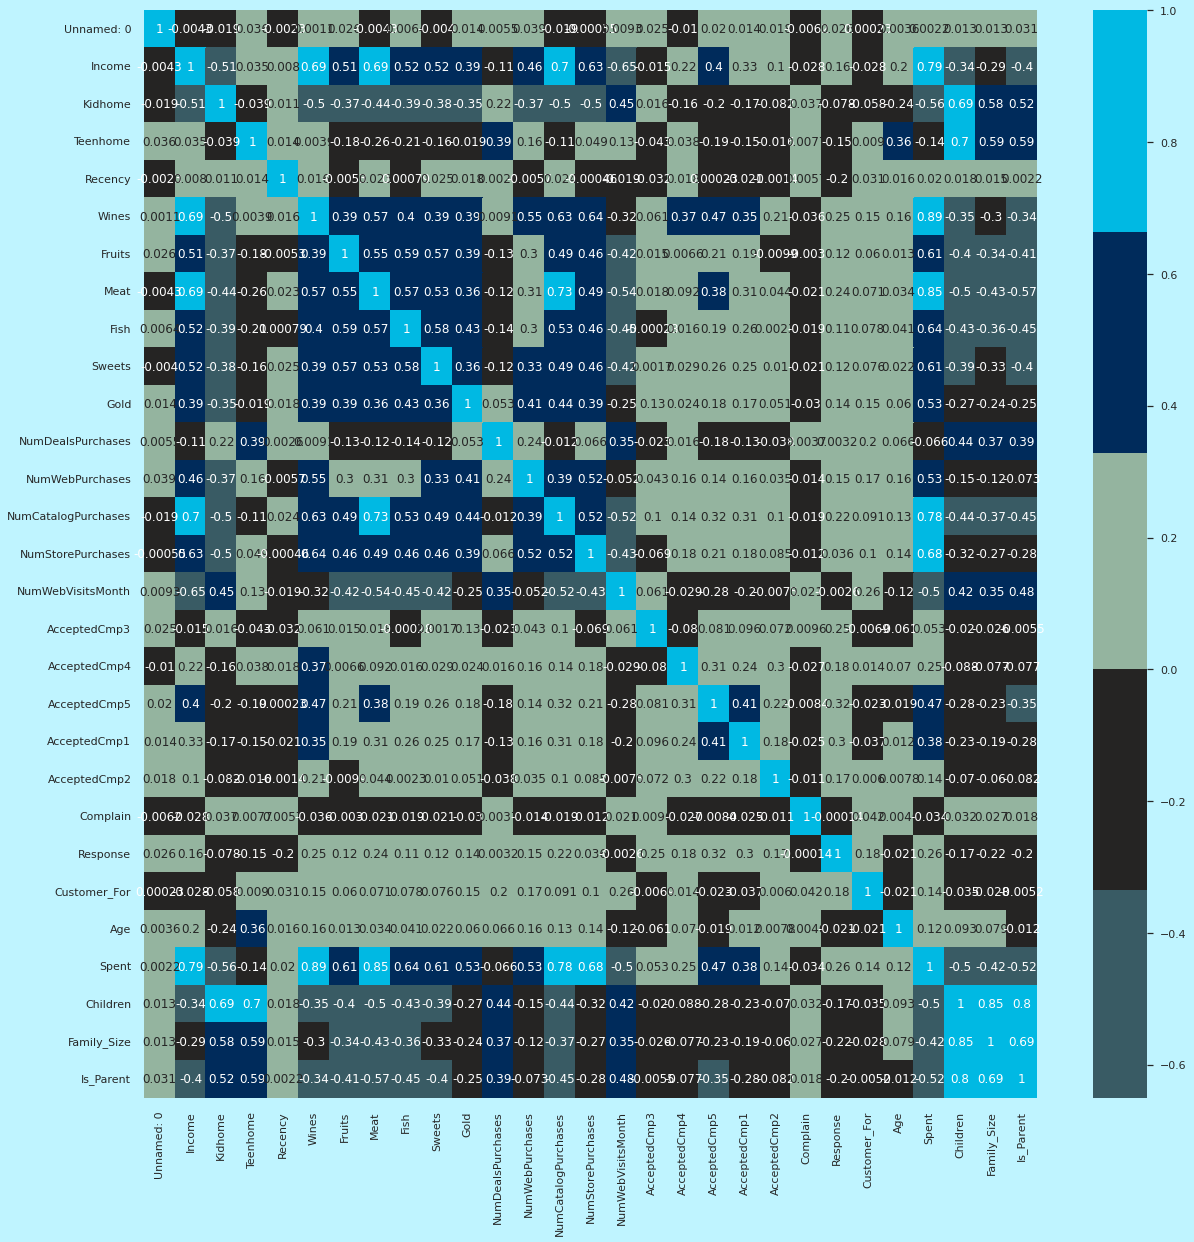

In [13]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [14]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [15]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [16]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [17]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Unnamed: 0  Education    Income   Kidhome  Teenhome   Recency     Wines  \
0   -1.747489  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660   
1   -1.745932  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618   
2   -1.744375  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935   
3   -1.742819  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618   
4   -1.741262   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257   

     Fruits      Meat      Fish  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.552041  1.690293  2.453472  ...             2.503607          -0.555814   
1 -0.637461 -0.718230 -0.651004  ...            -0.571340          -1.171160   
2  0.570540 -0.178542  1.339513  ...            -0.229679           1.290224   
3 -0.561961 -0.655787 -0.504911  ...            -0.913000          -0.555814   
4  0.419540 -0.218684  0.152508  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 24 columns]

In [18]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  2.441286e-16  2.878378 -5.970347 -2.539022 -0.781252  2.383653   
col2  2212.0  0.000000e+00  1.707224 -4.309995 -1.331542 -0.161811  1.235599   
col3  2212.0  6.745659e-17  1.221972 -3.544118 -0.825650 -0.024496  0.806923   

           max  
col1  7.443682  
col2  6.136659  
col3  6.584719

In [19]:
pca2=PCA_ds.copy()

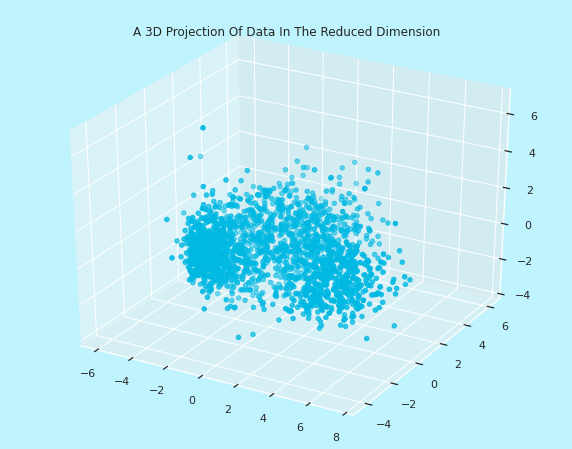

In [20]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#00B9E3", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


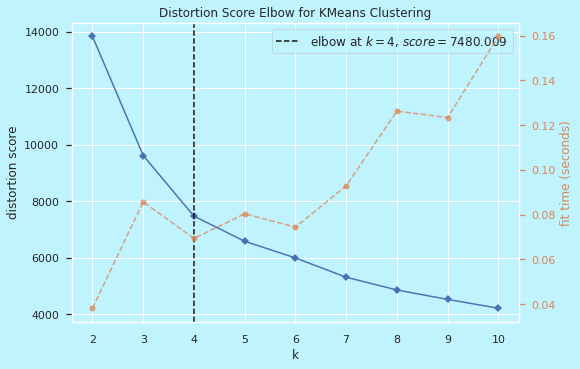

In [21]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [22]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["ClustersACM"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["ClustersACM"]= yhat_AC

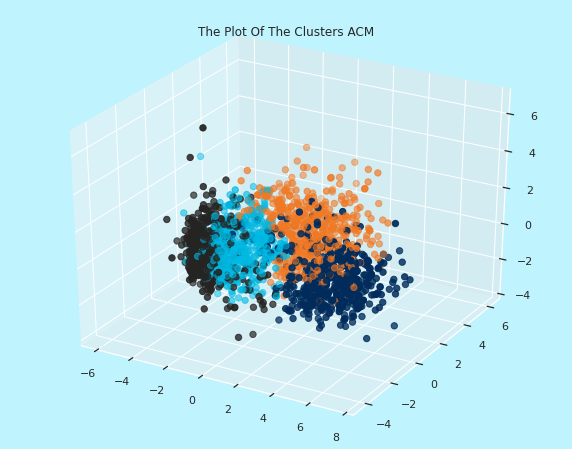

In [23]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["ClustersACM"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters ACM")
plt.show()

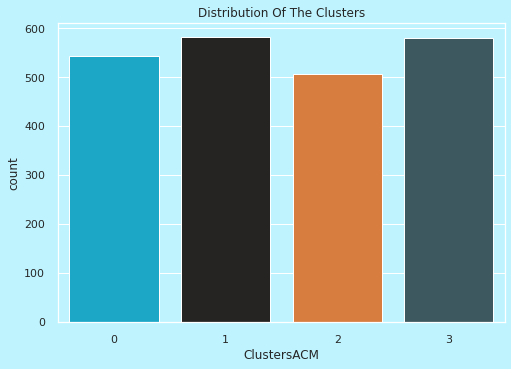

In [24]:
#Plotting countplot of clusters
pal =  ["#00B9E3","#252423","#F17925" ,"#395B64"]
pl = sns.countplot(x=data["ClustersACM"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

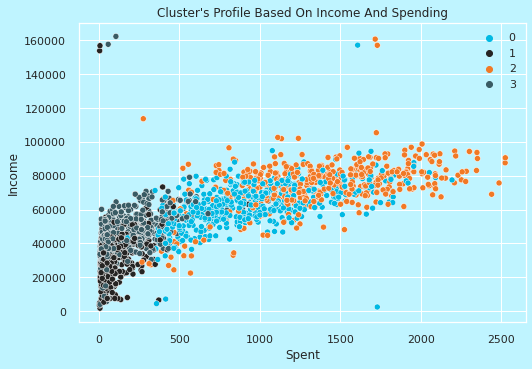

In [25]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["ClustersACM"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

group 0: high spending & average income

group 1: high spending & high income

group 2: low spending & low income

group 3: high spending & low income

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


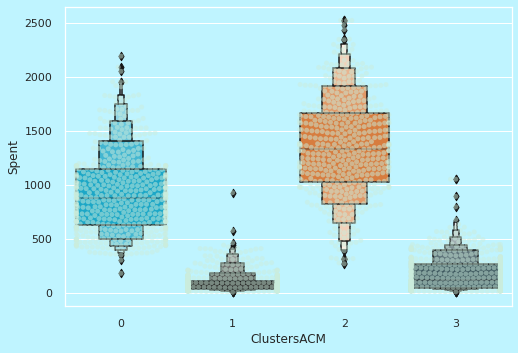

In [26]:
plt.figure()
pl=sns.swarmplot(x=data["ClustersACM"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["ClustersACM"], y=data["Spent"], palette=pal)
plt.show()

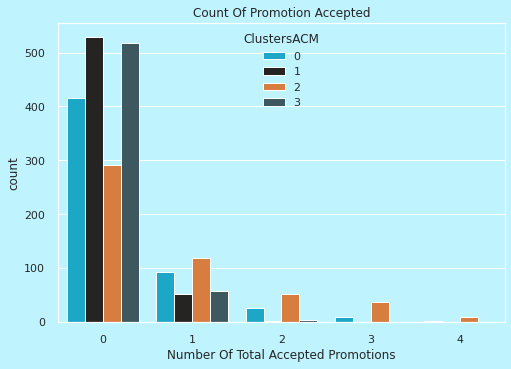

In [27]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["ClustersACM"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

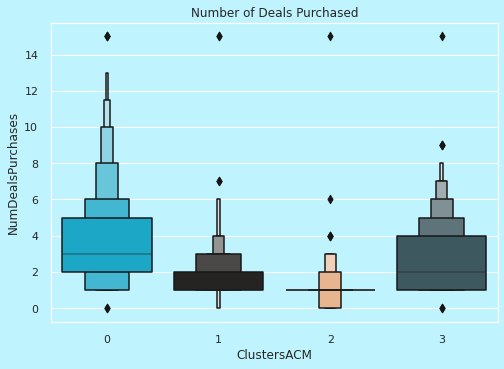

In [28]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["ClustersACM"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

[[0.         9.13266662 3.78608981 ... 3.47466334 6.1620082  8.53389909]
 [9.13266662 0.         5.86437334 ... 6.42204203 5.60898691 2.38551109]
 [3.78608981 5.86437334 0.         ... 1.37992593 3.6582615  5.9849142 ]
 ...
 [3.47466334 6.42204203 1.37992593 ... 0.         4.80572753 6.5946717 ]
 [6.1620082  5.60898691 3.6582615  ... 4.80572753 0.         5.36278499]
 [8.53389909 2.38551109 5.9849142  ... 6.5946717  5.36278499 0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


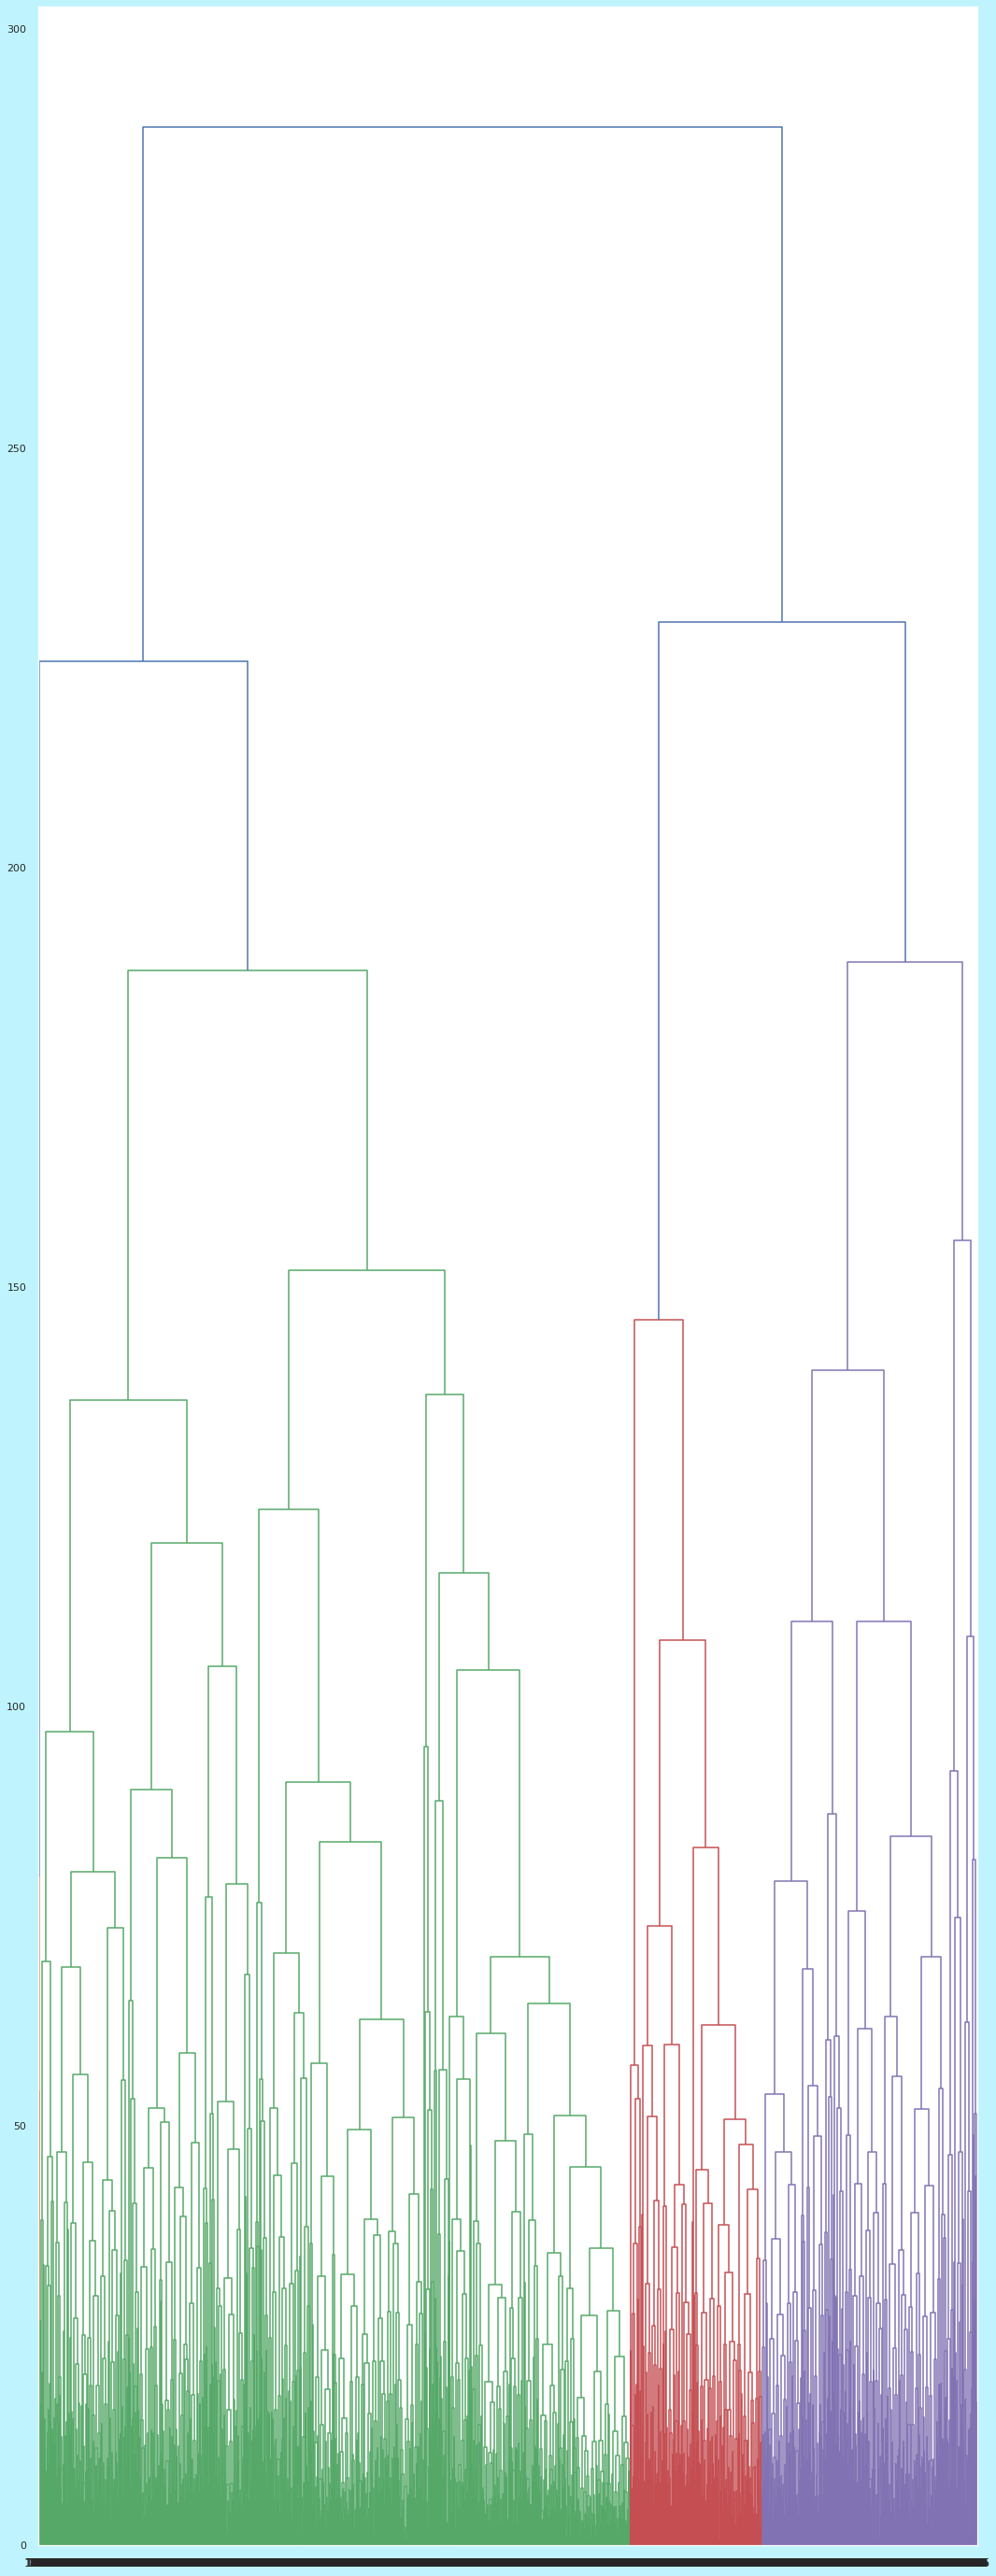

In [29]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(PCA_ds, PCA_ds)
print(dist)
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')

<Figure size 576x396 with 0 Axes>

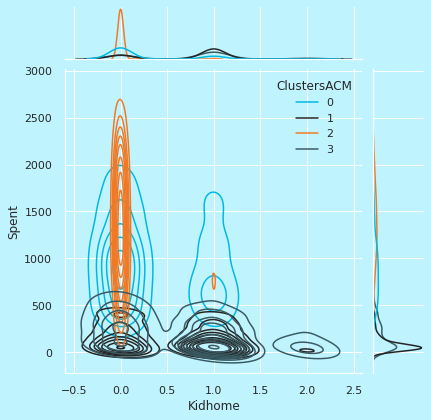

<Figure size 576x396 with 0 Axes>

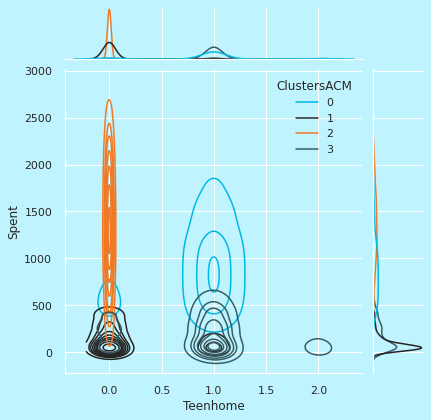

<Figure size 576x396 with 0 Axes>

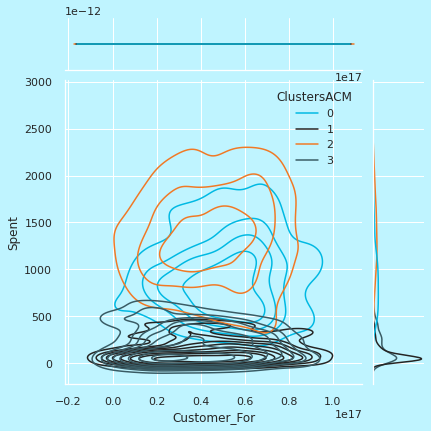

<Figure size 576x396 with 0 Axes>

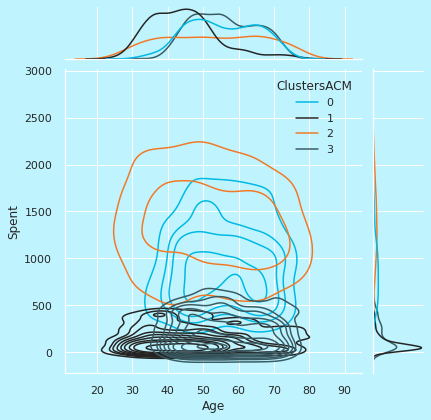

<Figure size 576x396 with 0 Axes>

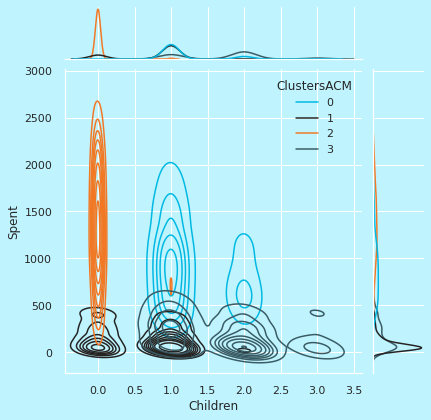

<Figure size 576x396 with 0 Axes>

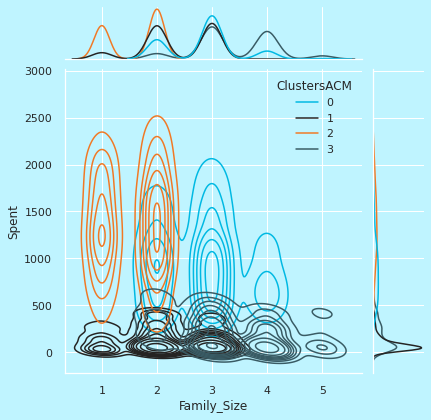

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

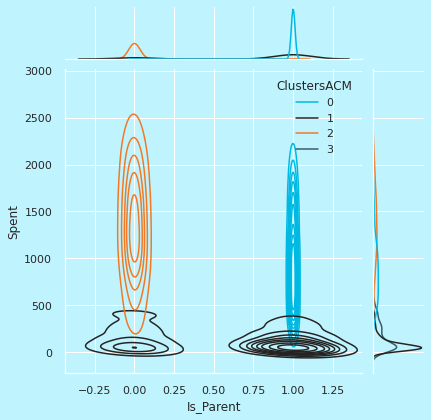

<Figure size 576x396 with 0 Axes>

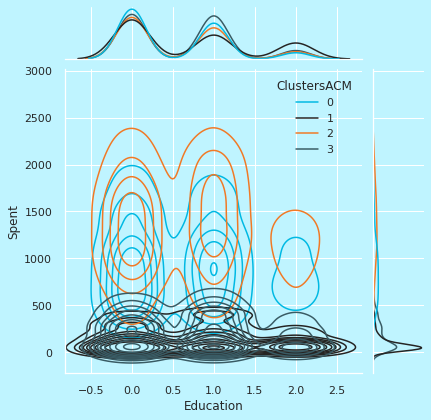

<Figure size 576x396 with 0 Axes>

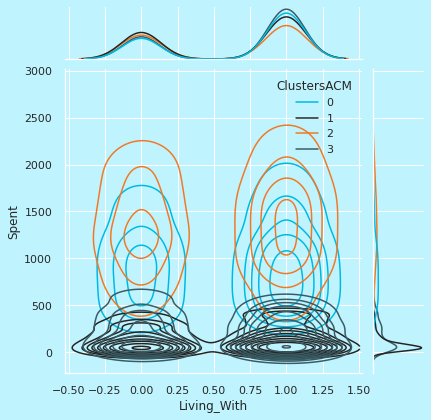

In [30]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["ClustersACM"], kind="kde", palette=pal)
    plt.show()

In [31]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4, linkage='average')
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["ClustersACMA"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["ClustersACMA"]= yhat_AC

In [32]:
print("0: ",len(PCA_ds.query('ClustersACMA == 0')))
print("1: ",len(PCA_ds.query('ClustersACMA == 1')))
print("2: ",len(PCA_ds.query('ClustersACMA == 2')))
print("3: ",len(PCA_ds.query('ClustersACMA == 3')))

0:  1196
1:  516
2:  3
3:  497


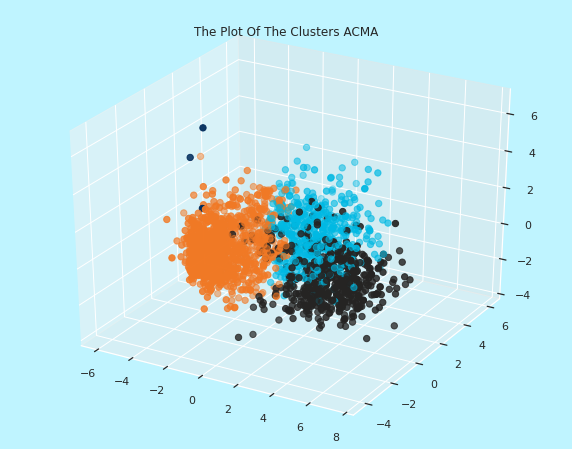

In [33]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["ClustersACMA"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters ACMA")
plt.show()

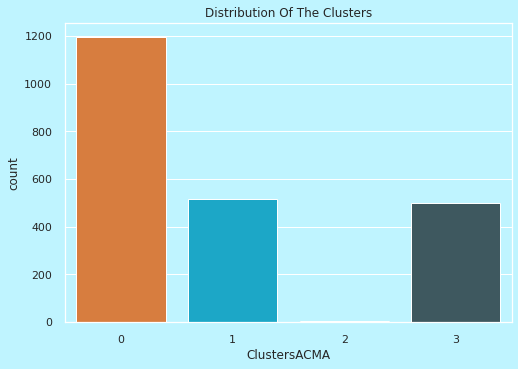

In [34]:
#Plotting countplot of clusters
pal =  ["#F17925","#00B9E3","#252423" ,"#395B64"]
pl = sns.countplot(x=data["ClustersACMA"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

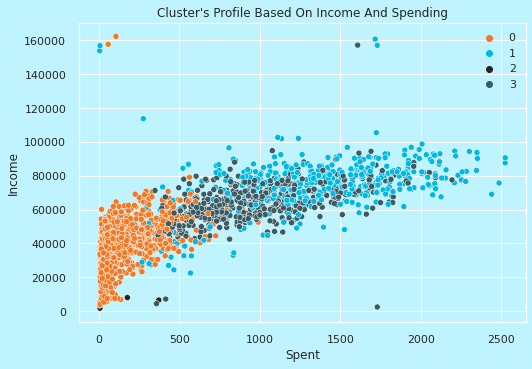

In [35]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["ClustersACMA"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


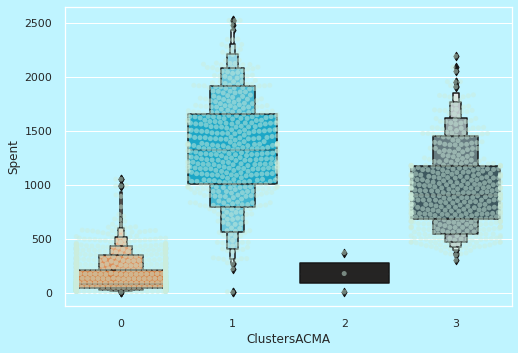

In [36]:
plt.figure()
pl=sns.swarmplot(x=data["ClustersACMA"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["ClustersACMA"], y=data["Spent"], palette=pal)
plt.show()

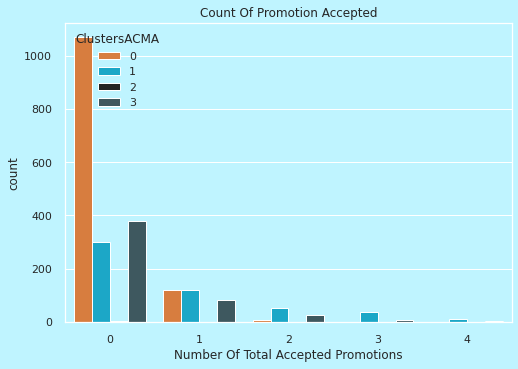

In [37]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["ClustersACMA"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

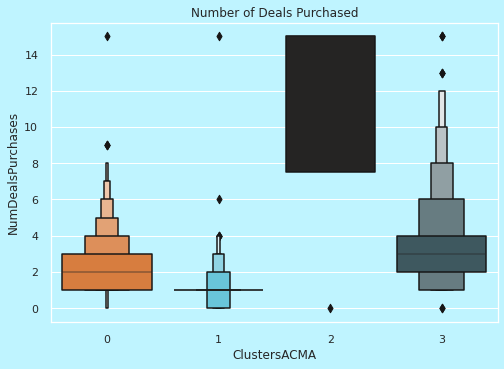

In [38]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["ClustersACMA"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

[[0.         9.18725201 3.78608981 ... 3.47466334 6.47845237 8.5922892 ]
 [9.18725201 0.         5.949023   ... 6.49943258 6.36087526 2.38551109]
 [3.78608981 5.949023   0.         ... 1.37992593 4.16927778 6.06788249]
 ...
 [3.47466334 6.49943258 1.37992593 ... 0.         5.20528742 6.67005959]
 [6.47845237 6.36087526 4.16927778 ... 5.20528742 0.         6.14487289]
 [8.5922892  2.38551109 6.06788249 ... 6.67005959 6.14487289 0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


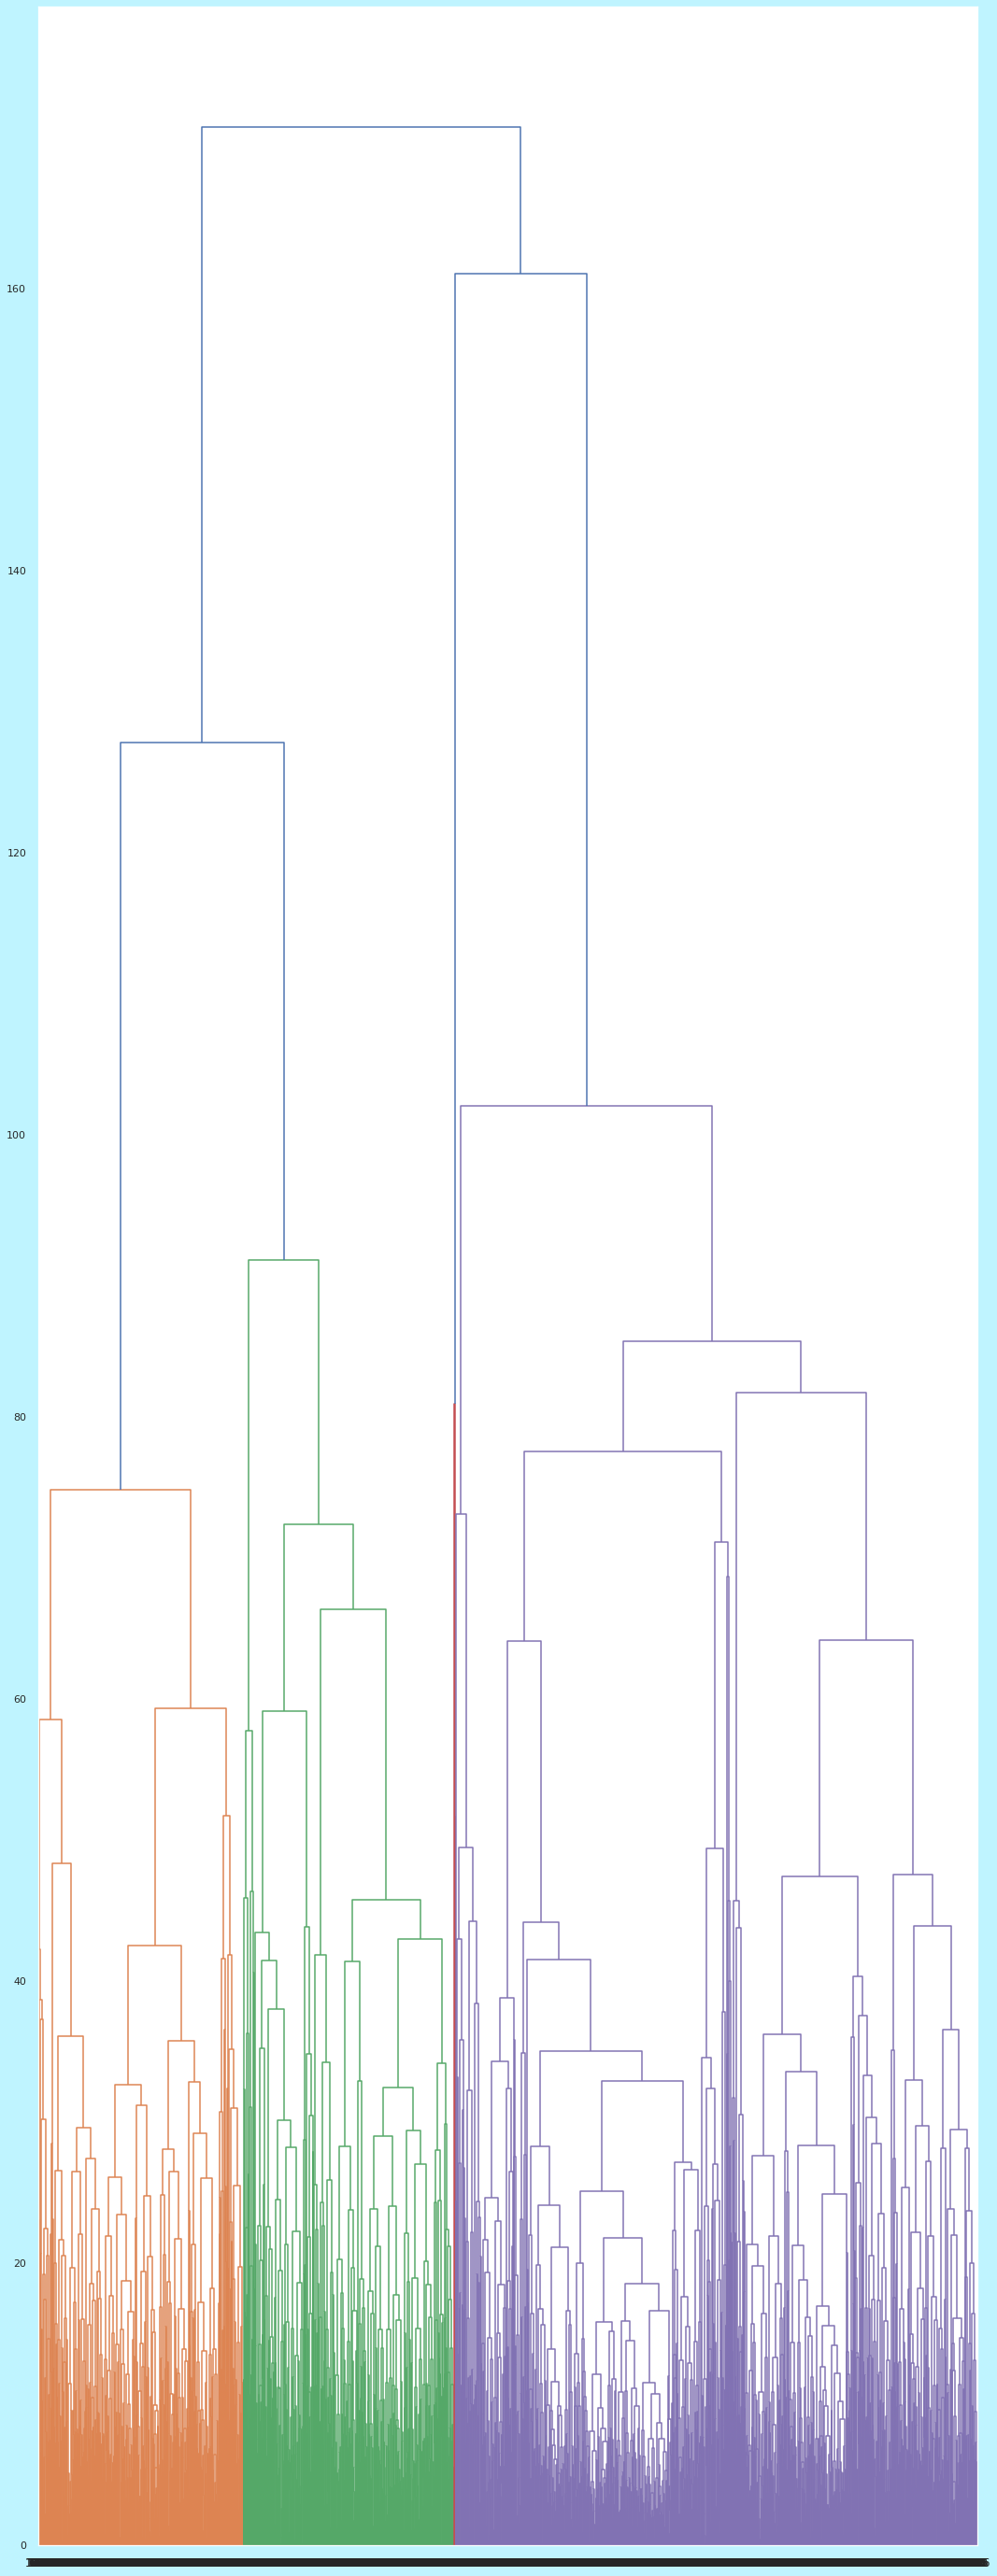

In [39]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
pc=PCA_ds.copy()
pc.drop(columns=["ClustersACM"])
dist = distance_matrix(pc, pc)
print(dist)
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

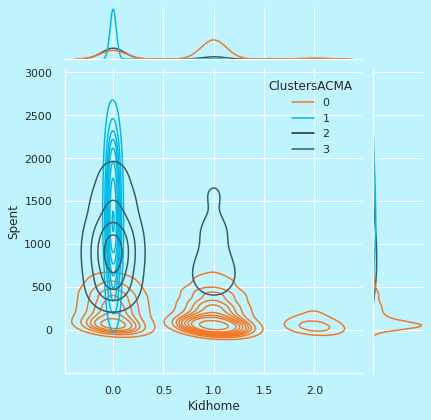

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

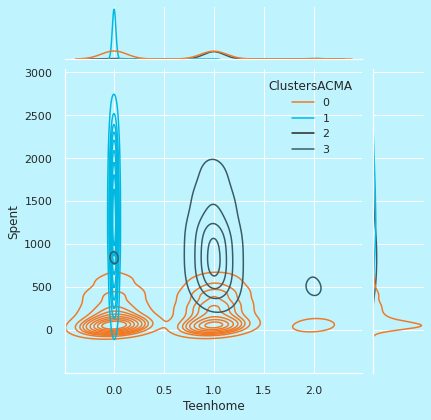

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


<Figure size 576x396 with 0 Axes>

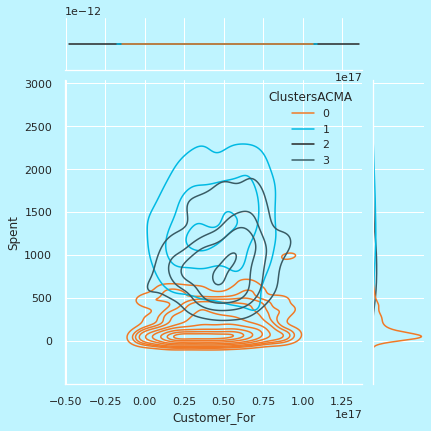

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


<Figure size 576x396 with 0 Axes>

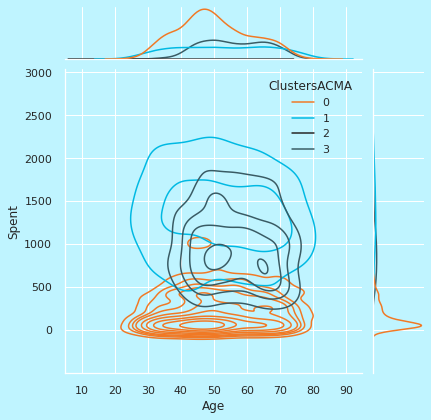

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

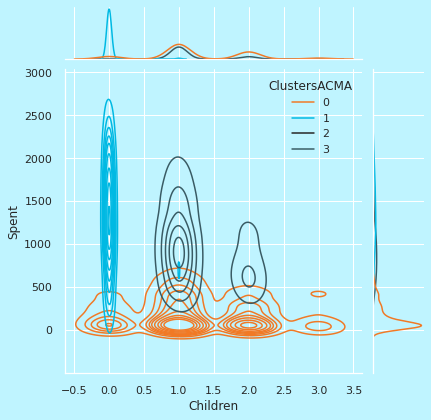

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

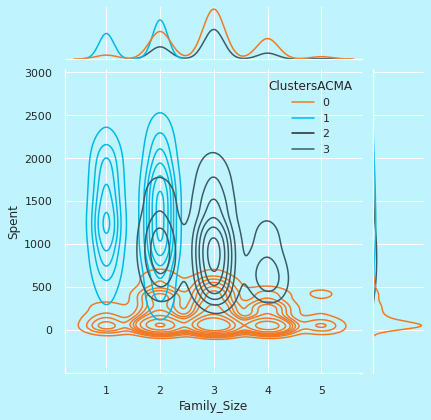

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

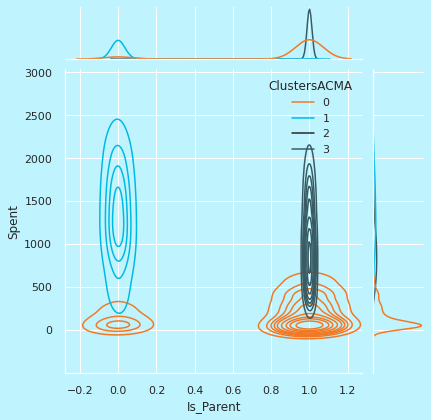

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


<Figure size 576x396 with 0 Axes>

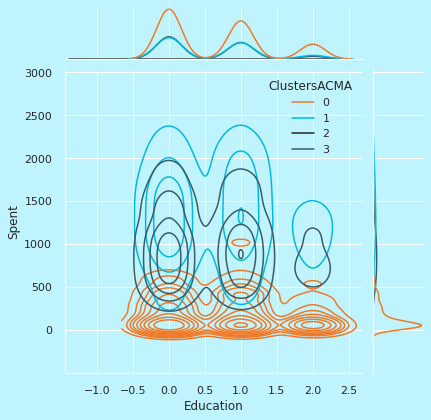

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

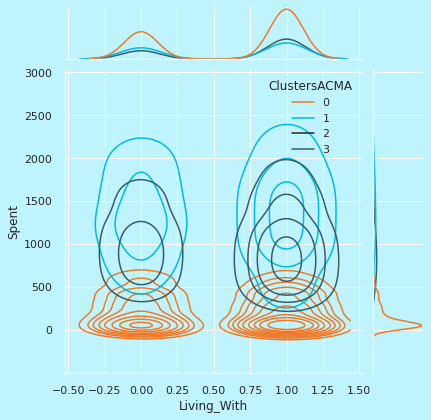

In [40]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["ClustersACMA"], kind="kde", palette=pal)
    plt.show()

**K-Means**

In [41]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4).fit(pca2)
PCA_ds["ClustersKM"] = km.labels_
#Adding the Clusters feature to the orignal dataframe.
data["ClustersKM"]= km.labels_

In [42]:
PCA_ds.tail()

col1      col2      col3  ClustersACM  ClustersACMA  ClustersKM
2207  2.319872  2.481709  0.544851            0             3           0
2208 -3.107421  4.064409 -1.485470            3             0           3
2209  2.672240 -1.823199  0.617537            2             1           2
2210  1.492594  1.747194 -1.608615            0             3           0
2211 -2.744067  1.694731 -0.264214            3             0           3

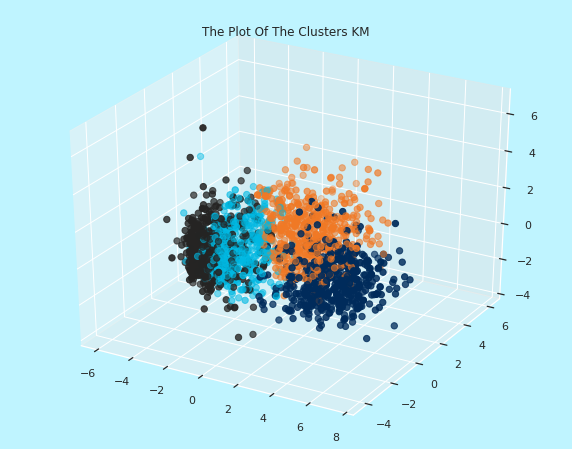

In [43]:
#Plotting the clusters of KM
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["ClustersKM"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters KM")
plt.show()

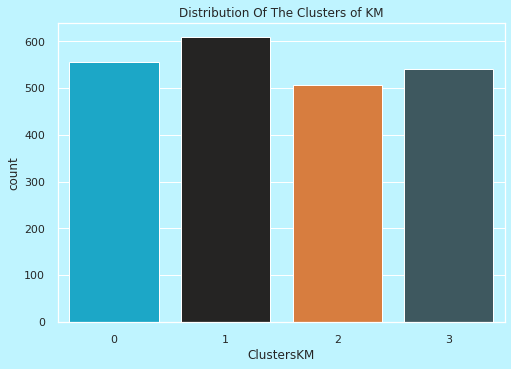

In [44]:
#Plotting countplot of clusters
pal =  ["#00B9E3","#252423","#F17925" ,"#395B64"]
pl = sns.countplot(x=data["ClustersKM"], palette= pal)
pl.set_title("Distribution Of The Clusters of KM")
plt.show()

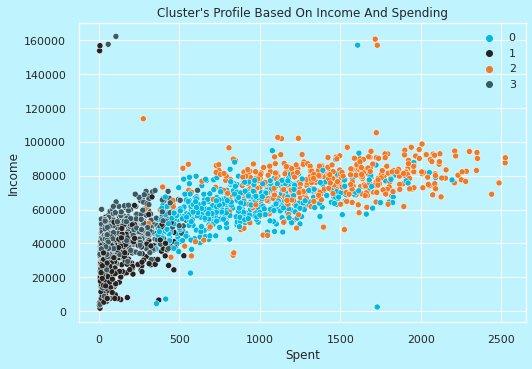

In [45]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["ClustersKM"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


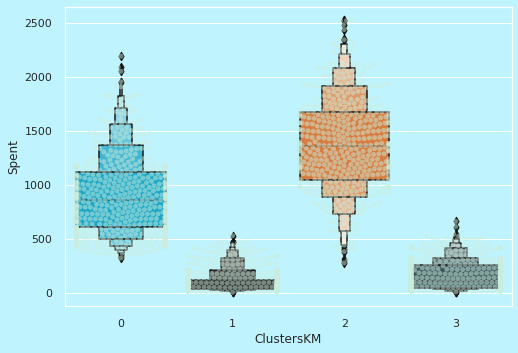

In [46]:
plt.figure()
pl=sns.swarmplot(x=data["ClustersKM"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["ClustersKM"], y=data["Spent"], palette=pal)
plt.show()

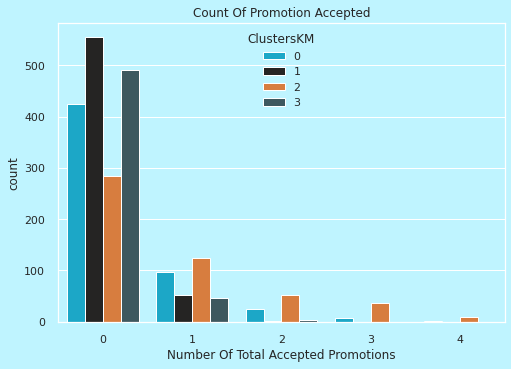

In [47]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["ClustersKM"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

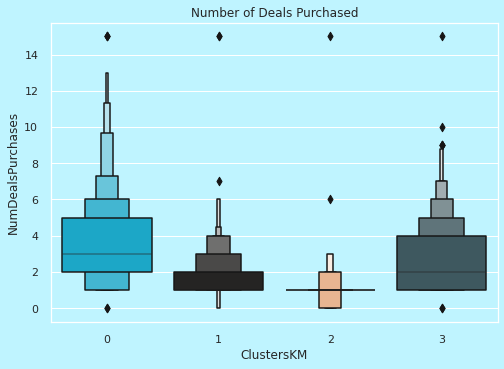

In [48]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["ClustersKM"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

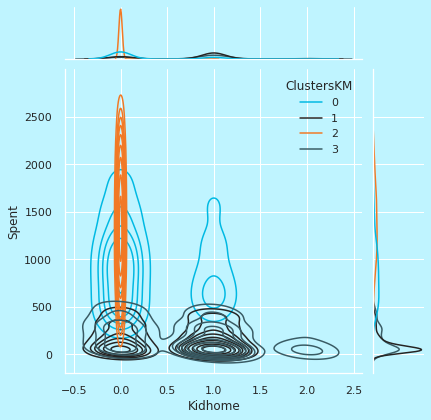

<Figure size 576x396 with 0 Axes>

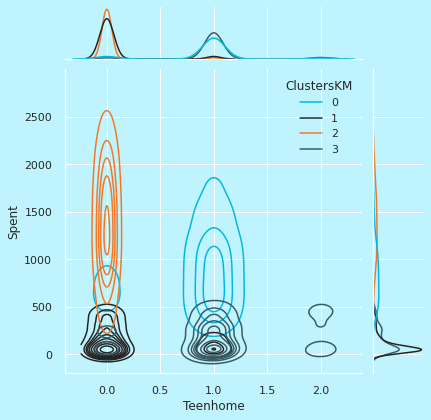

<Figure size 576x396 with 0 Axes>

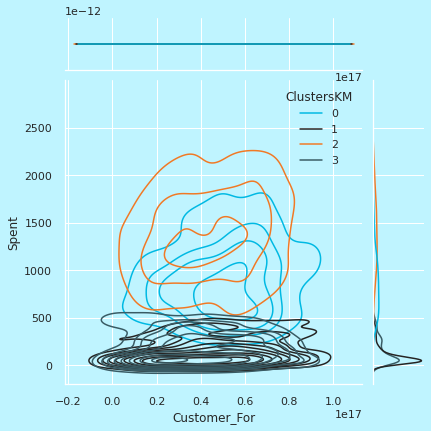

<Figure size 576x396 with 0 Axes>

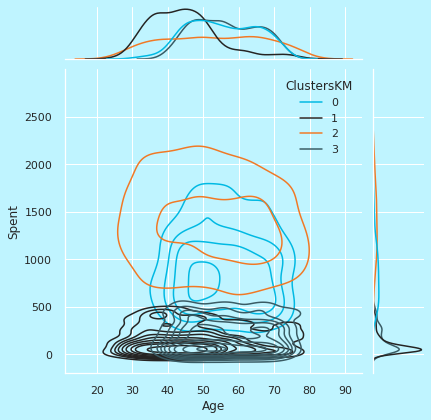

<Figure size 576x396 with 0 Axes>

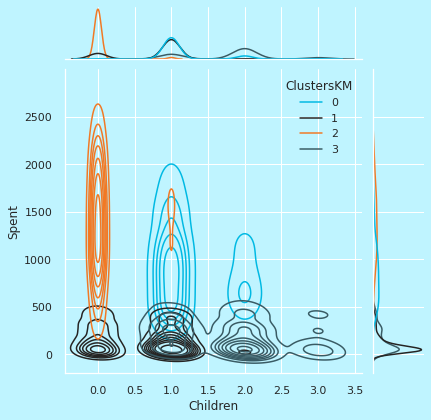

<Figure size 576x396 with 0 Axes>

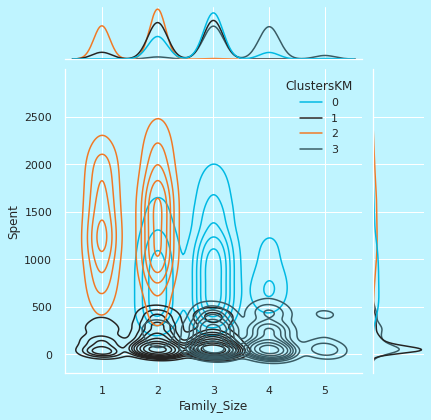

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

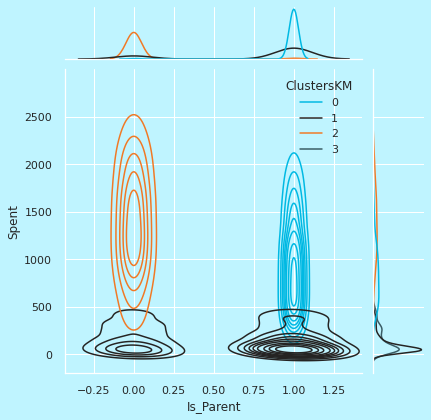

<Figure size 576x396 with 0 Axes>

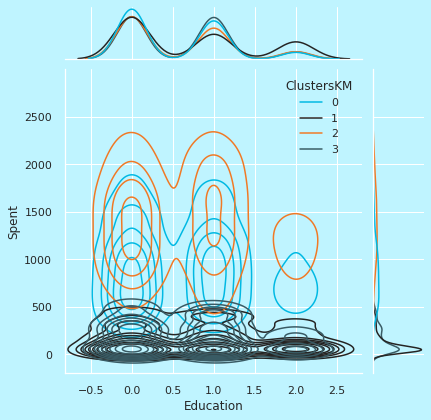

<Figure size 576x396 with 0 Axes>

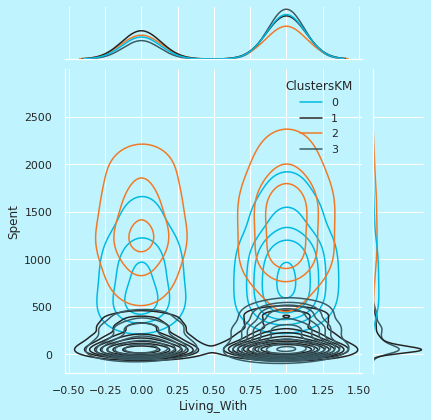

In [49]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["ClustersKM"], kind="kde", palette=pal)
    plt.show()

In [50]:
print(len(PCA_ds.query("ClustersACM != ClustersKM")))
PCA_ds.query("ClustersACM != ClustersKM")

139


col1      col2      col3  ClustersACM  ClustersACMA  ClustersKM
16    0.523832 -1.327029  0.703066            2             1           1
19    0.253558 -2.105021  1.656684            2             1           1
31   -1.543100  2.635742  0.527492            0             3           3
54   -0.760884  1.347775 -0.276145            3             0           0
58    0.247519  0.726410 -0.550269            3             0           0
...        ...       ...       ...          ...           ...         ...
2171 -0.183080  1.121474 -0.149009            3             0           0
2172 -1.618599  3.218586  0.206387            0             3           3
2182 -2.528813 -0.456682  0.211054            3             0           1
2193 -1.286431  0.258598  1.874677            0             0           1
2198  0.357622  0.673338 -0.546130            3             0           0

[139 rows x 6 columns]

In [51]:
pca2.head()

col1      col2      col3
0  4.995800 -0.196504  2.624580
1 -2.882999 -0.052852 -1.882026
2  2.619316 -0.765618 -0.267289
3 -2.674573 -1.587151 -0.941151
4 -0.648142  0.164021 -0.047606

In [52]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.5, min_samples=25).fit(pca2)
PCA_ds['DBSCAN'] = db.labels_
data['DBSCAN'] = db.labels_

In [53]:
PCA_ds.nunique()

col1            2212
col2            2212
col3            2212
ClustersACM        4
ClustersACMA       4
ClustersKM         4
DBSCAN             3
dtype: int64

In [54]:
PCA_ds.head()

col1      col2      col3  ClustersACM  ClustersACMA  ClustersKM  DBSCAN
0  4.995800 -0.196504  2.624580            2             1           2      -1
1 -2.882999 -0.052852 -1.882026            3             0           3       1
2  2.619316 -0.765618 -0.267289            2             1           2      -1
3 -2.674573 -1.587151 -0.941151            1             0           1       0
4 -0.648142  0.164021 -0.047606            3             0           3      -1

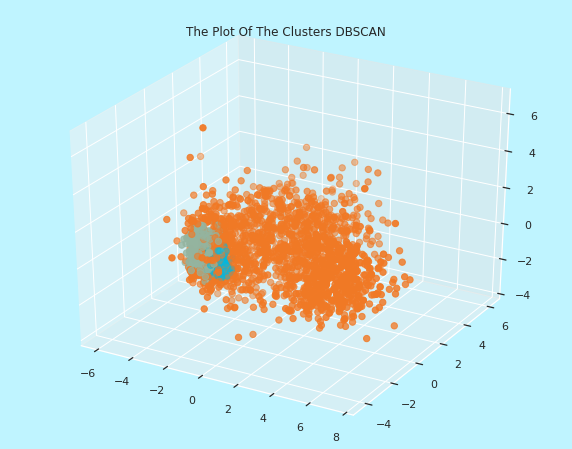

In [55]:
#Plotting the clusters of DBSCAN
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["DBSCAN"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters DBSCAN")
plt.show()

In [56]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# The following bandwidth can be automatically detected using
#bandwidth = estimate_bandwidth(pca2, quantile=0.1)
ms = MeanShift().fit(pca2)
PCA_ds['MS'] = ms.labels_
data['MS'] = ms.labels_

In [57]:
PCA_ds['MS'].nunique()

2

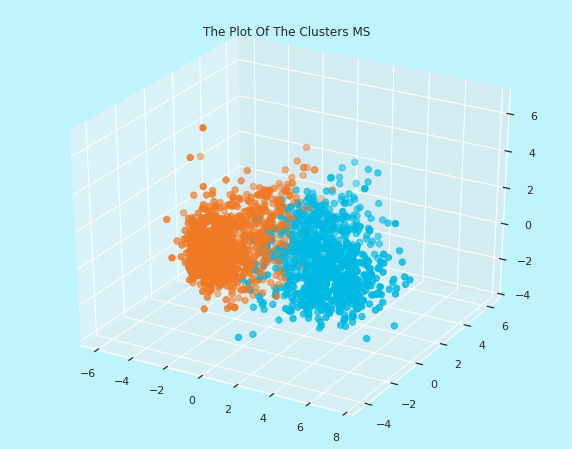

In [58]:
#Plotting the clusters of MS
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["MS"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters MS")
plt.show()

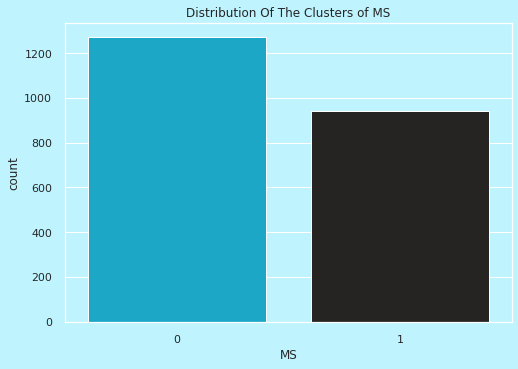

In [59]:
#Plotting countplot of clusters
pal =  ["#00B9E3","#252423","#F17925" ,"#395B64"]
pl = sns.countplot(x=data["MS"], palette= pal)
pl.set_title("Distribution Of The Clusters of MS")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


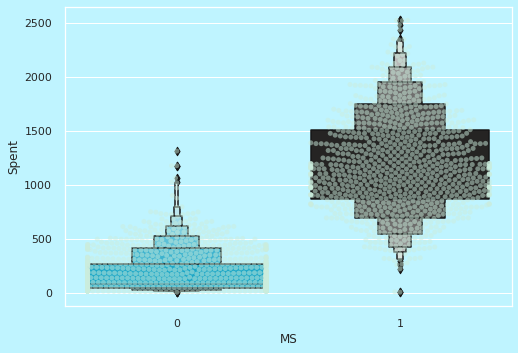

In [60]:
plt.figure()
pl=sns.swarmplot(x=data["MS"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["MS"], y=data["Spent"], palette=pal)
plt.show()

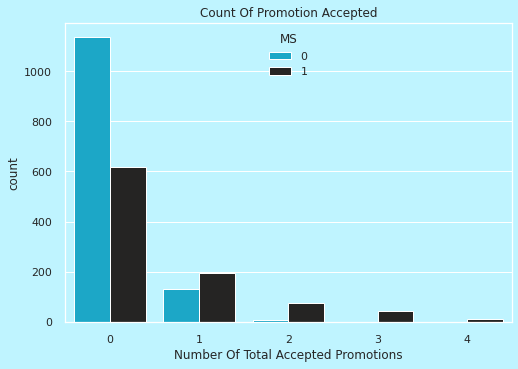

In [61]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["MS"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

<Figure size 576x396 with 0 Axes>

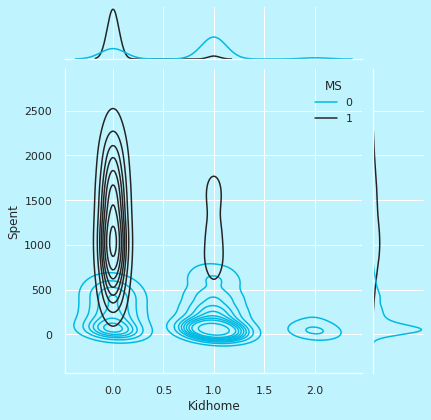

<Figure size 576x396 with 0 Axes>

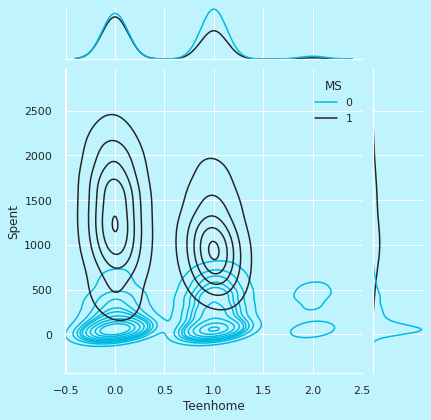

<Figure size 576x396 with 0 Axes>

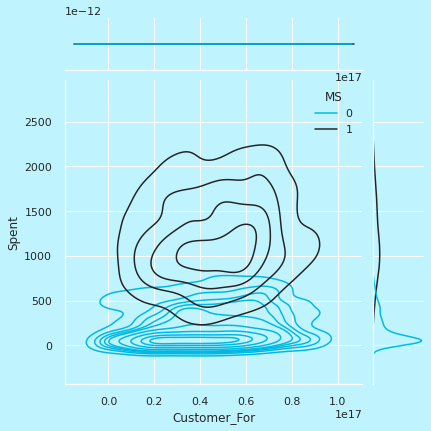

<Figure size 576x396 with 0 Axes>

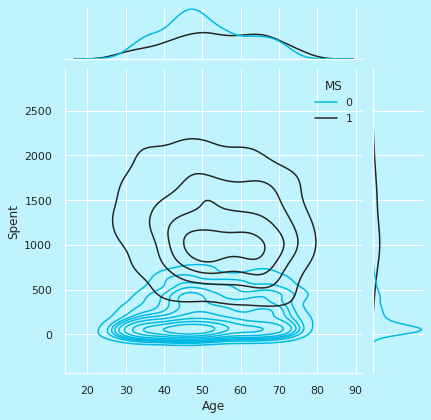

<Figure size 576x396 with 0 Axes>

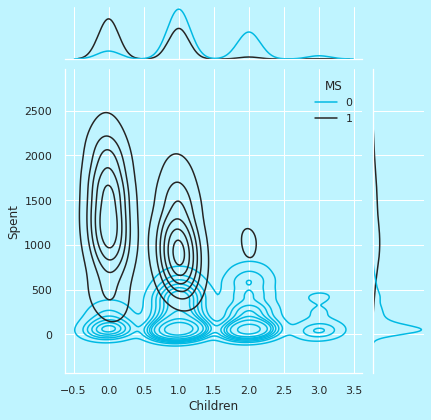

<Figure size 576x396 with 0 Axes>

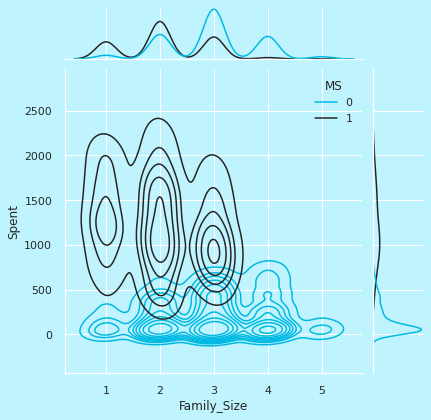

<Figure size 576x396 with 0 Axes>

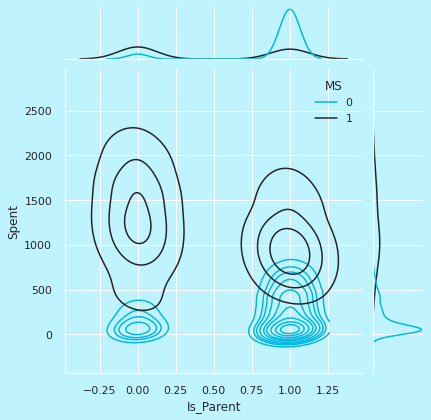

<Figure size 576x396 with 0 Axes>

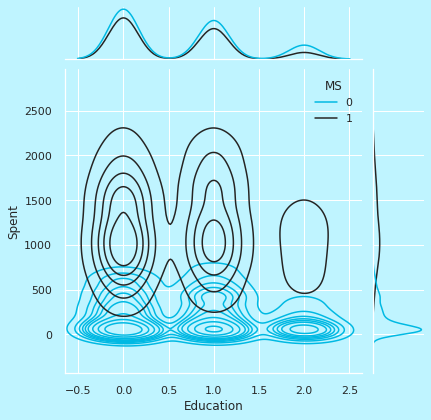

<Figure size 576x396 with 0 Axes>

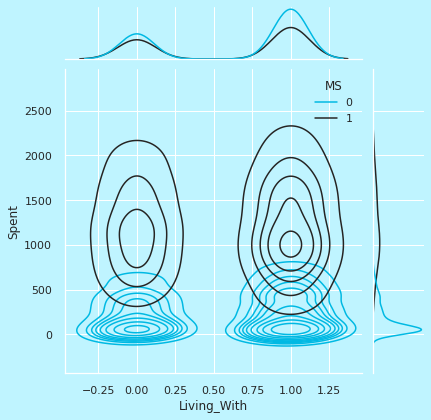

In [62]:
pal =  ["#00B9E3","#252423"]
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["MS"], kind="kde", palette=pal)
    plt.show()